In [95]:
import os
os.chdir('/g/data/w28/ym7079/Hackthon/DOC/hk25-AusNode-DOCmeso')
import sys
sys.path.insert(0,os.getcwd())
import xarray as xr
import utils
import utils.util_calc.doc_metrics.i_org.i_org_calc as doc
import numpy as np

In [96]:
f = xr.open_dataset('/scratch/nf33/hk25_DOCmeso/ICON_interp/ICON_pr_z10_2020-04-01_MarCont.nc')
conv_regions = f['pr'][0,:,:]
cores = np.loadtxt('/g/data/w28/ym7079/Hackthon/DOC/hk25-AusNode-DOCmeso/get_metrics/Yinglin/ICON_cores/2020-04-01.txt')
core_lat = cores[:673,1]
core_lon = cores[:673,2]
f.close()

In [97]:
conv_regions.lat
conv_regions.lon

<xarray.DataArray 'lon' (lon: 490)> Size: 2kB
array([100.049995, 100.15    , 100.25    , ..., 148.75    , 148.84999 ,
       148.95    ], dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2020-04-01
  * lon      (lon) float32 2kB 100.0 100.2 100.2 100.3 ... 148.8 148.8 148.9

In [98]:
obs_cdf, n, NN_distances, r = doc.get_cdf(core_lat,core_lon)


In [99]:
poisson_cdf = doc.get_poisson_cdf(conv_regions.lat,conv_regions.lon,n, NN_distances, r)

In [100]:
i_org = doc.get_i_org(conv_regions.lat,conv_regions.lon, core_lat, core_lat)

In [101]:
len(r)



100

In [38]:
len(obs_cdf)

100

In [102]:
import matplotlib.pyplot as plt

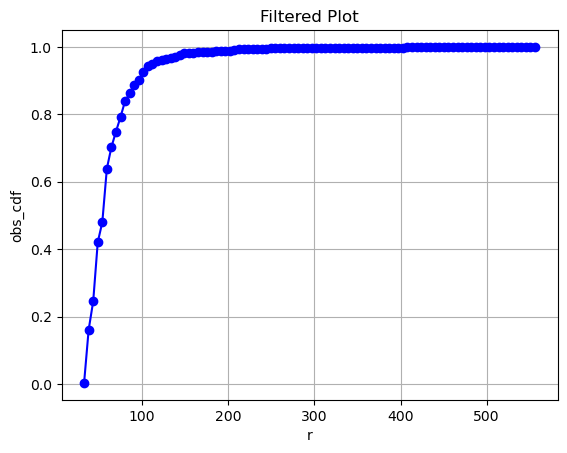

In [103]:
#mask = r <= 2000  # 创建布尔掩码
#plt.plot(r[mask], obs_cdf[mask], color='blue', marker='o')
plt.plot(r, obs_cdf, color='blue', marker='o')
plt.xlabel('r')
plt.ylabel('obs_cdf')
plt.title('Filtered Plot')
plt.grid(True)
plt.show()

In [81]:
np.min(obs_cdf)

0.0015444015444015444

In [82]:
np.max(r)

262.19929700672157

In [ ]:
np.min(np.max()

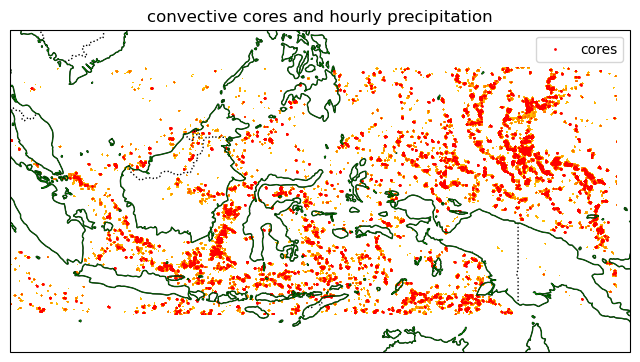

In [133]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

data_proj = ccrs.PlateCarree()
# 创建带投影的地图画布
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# 添加地理要素
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.OCEAN, color='white', zorder=0)
ax.add_feature(cartopy.feature.LAND, color='white',zorder=0, 
               linewidth=0.5, edgecolor='green')    
ax.coastlines(resolution='50m', linewidth=0.5, color='green')


# 设置范围（根据你数据的分布来设定）
ax.set_extent([100, 150, -13, 13], crs=ccrs.PlateCarree())

# 添加标题和图例
ax.set_title('convective cores and hourly precipitation')
#ax.set_title('convective cores')
# c = ax.contourf(conv_regions.lon, conv_regions.lat,conv_regions*3600 > 5, cmap='Greys_r', #autumn_r', 
#                 vmin = 0,
#                 vmax = 1,
#                 levels=[1,1.5,2,5,10,15,20],
#                extend='max',transform=data_proj)
# c = ax.contourf(
#     conv_regions.lon, conv_regions.lat,
#     (conv_regions * 3600 > 5).astype(int),  # 转成 0/1 整数
#     cmap='Greys',
#     levels=[-0.5, 0.5, 1.5],  # 区分 0 和 1 的色阶
#     transform=data_proj
# )
conv_hourly = conv_regions * 3600

c = ax.contourf(
    conv_regions.lon, conv_regions.lat,
    conv_hourly,
    cmap='autumn_r',
    levels=[1, 1.5, 2,2.5,3,3.5,4,4.5, 5],
    vmin=0,
    vmax=5,
    extend='max',
    transform=data_proj
)

# 画点
ax.scatter(core_lon, core_lat, color='red', s=1, transform=ccrs.PlateCarree(), label='cores')
#cbar = plt.colorbar(c,pad=0.05,orientation='horizontal',shrink=0.6)
#cbar.set_label('Hourly precipitation[mm]')
ax.legend()
plt.savefig('/g/data/w28/ym7079/Hackthon/DOC/hk25-AusNode-DOCmeso/get_metrics/Yinglin/ICON_cores/iorg_2020-04-01_00.png',dpi=300, bbox_inches='tight', transparent=False,format='png')
plt.show()

In [88]:
print(np.mean(conv_regions*3600))

<xarray.DataArray 'pr' ()> Size: 4B
array(0.35766634, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2020-04-01
